### Single-Layer Perceptron Algorithm from Scratch #####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Defining the necessary functions #####

The single-layer perceptron is a fundamental technique in neural network learning. It forms the basis on which other complex neural network techniques have been built over the years. There are numerous materials that can be found on the internet giving the theoretical aspects and what each part of the algorithm does. Here, we code each part and use the system to classify the data as we did for the kNN and Neighborhood algorithms. A brief overview of each part is presented along.

In [2]:
# defining the step function
# The single-layer perceptron is a linear threshold unit (LTU), i.e., it has a linear composition fucntion and a threshold
# activation funciton. The step function is the activation fucntion that is threshold in nature; i.e., we give a threshold
# where the result belongs to a class if it satisfies the threshold, or belongs to another class if it does not.
# Note that the LTU is only applicable to binary classification. Multiclass data cannot be handled by the SLP, which is the
# major drawback of the tehcnique.
def stepfunction(t):
    if(t>0):
    # if the result (t) is greater than zero, return class 1, else return class 0
        return 1
    return 0

In [3]:
# defining the prediction function
def prediction(X,W,b):
    # we find t using the linear composition function that simply performs a matrix multiplication 
    return stepfunction((np.matmul(X,W)+b)[0])

In [4]:
# defining the weight update function
def perceptronStep(X,y,W,b,learn_rate):
    """
    Input:
            X: sample datapoint
            y: sampe class
            W: weight matrix
            b: bias
            learn_rate: learning rate
    """
    # Since the SLP is a neural learning algorithm, we need to specify the learning technique. Here, we check the differnce 
    # between the actual and the predicted, and change the weight based  on a certain amount called the learning rate. Small
    # values are usually preferred. 
    predicted = []

    for i in range(len(X)):
        y_pred = prediction(X[i],W,b)
        W[0] += X[i][0]*learn_rate*(y[i] - y_pred)
        W[1] += X[i][1]*learn_rate*(y[i] - y_pred)
        b += learn_rate*(y[i] - y_pred)
        predicted.append(y_pred) 
        
    return predicted,[W,b]

In [5]:
# defining the epochs iteration for training
def trainPerceptronAlgo(X,y,learn_rate,weights,num_epochs):
    # putting everything together to train the algorithm 
    
    W = [[weights[0]],[weights[1]]]
    b = weights[2]
    boundary_lines = []
    hypothesis = []
    weight_5 = []
    
    for i in range(num_epochs):
        predicts_weights_bias = perceptronStep(X,y,W,b,learn_rate)
        W,b = predicts_weights_bias[-1]
        predicted = predicts_weights_bias[0]
        
        # this part of the code just saves some values along the training.
        if ((i == 0) | ((i+1) % 5 == 0)):
            hypothesis.extend([predicted])
            
            ###
            weight_5.extend([[W[0][0],W[1][0],b]])
            ###
     
    boundary_lines.append((-W[0]/W[1],-b/W[1]))
    trained = [W[0],W[1],b]
    return hypothesis,trained,weight_5,boundary_lines

In [6]:
# defining the testing algorithm
def testPerceptronAlgo(X,y,learn_rate,weights,num_epochs):
    W = [[weights[0]],[weights[1]]]
    b = weights[2]
    hypothesis = []
    
    for i in range(0,num_epochs):
        predicted = []
        for j in range(len(X)):
            predicted.append(prediction(X[j],W,b))
        if ((i == 0) | ((i+1) % 5 == 0)):
            hypothesis.extend([predicted])
    return hypothesis

#### Finding Classification Metrics - Balanced Accuracy, Precision, Recall, and F1 Score ####

The function below is to determine the performance of the classification algorithm using various classification metrics. Here, we use Balanced accuracy, Precision, Recall, and F1 score. Interested readers can read about the formulas using online resources.

In [7]:
# defining the performance measure
def performance(y_hypo,measure):
    """
    Pass the predictions and the performance (as a string) required
    
    """
    Q_00 = 0
    Q_11 = 0
    Q_01 = 0
    Q_10 = 0
    bal_accuracy = []
    recall = []
    precision = []
    f1_score = []

    for j in range((np.shape(y_hypo)[0])):

        for i in range(len(y)):
            if y[i] == 0 and y_hypo[j][i] == 0:
                Q_00 = Q_00 + 1
            elif y[i] == 1 and y_hypo[j][i] == 1:
                Q_11 = Q_11 + 1
            elif y[i] == 0 and y_hypo[j][i] == 1:
                Q_01 = Q_01 + 1
            elif y[i] == 1 and y_hypo[j][i] == 0:
                Q_10 = Q_10 + 1 

        bal_acc = ((Q_11 /(Q_11+Q_10)) + (Q_00 / (Q_01+Q_00)))/2

        recall.append((Q_11 /(Q_11+Q_10)))
        precision.append((Q_11 /(Q_11+Q_01)))
        bal_accuracy.append(bal_acc)
        f1_score.append(2/((1/(Q_11 /(Q_11+Q_01)+1/(Q_11 /(Q_11+Q_10))))))
    
    if measure == 'balanced accuracy':
        return bal_accuracy
    elif measure == 'precision':
        return precision
    elif measure == 'recall':
        return recall
    elif measure == 'f1_score':
        return f1_score
    else:
        return "Please ensure you have a valide measure"
    

#### Data Cleaning #####

In [8]:
data = pd.read_csv('Data.txt', delim_whitespace=True, header = None)
data.drop([2, 3, 4, 5], axis = 1, inplace = True)
data.drop([0, 1, 2], axis = 0, inplace = True)
data.columns = ['P', 'N']
inds = pd.isnull(data).any(1).nonzero()[0][0]

In [9]:
y_true = np.ones(len(data['P']))
for i in range(0,len(y_true)):
    if i < inds:
        y_true[i] = 0

In [10]:
data['y_true'] = y_true

In [11]:
data.dropna(inplace=True)
data.reset_index(inplace = True, drop = True)
data.drop(inds, inplace=True)
data['P'] = pd.to_numeric(data['P'])
data['N'] = pd.to_numeric(data['N'])
data.reset_index(inplace = True, drop = True)

In [12]:
X = data.loc[:,['P', 'N']]
y = data.loc[:,'y_true']
X = X.values
y = y.values

In [13]:
# splitting the data for training testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Training #####

In [14]:
wei = [0,0,1]

In [15]:
X = X_train
y = y_train

In [16]:
result_train = trainPerceptronAlgo(X=X,y=y,learn_rate=0.01,weights=wei,num_epochs=150)

#### Obtaining the Training Errors #####

In [17]:
y_hypo = result_train[0]

In [18]:
bal_accuracy = performance(y_hypo,'balanced accuracy')

In [19]:
epoch_num = list(range((np.shape(y_hypo)[0])))
epoch_num = [i * 5 for i in epoch_num]

In [20]:
train_error = [1 - i for i in bal_accuracy]

#### Plotting the results #####

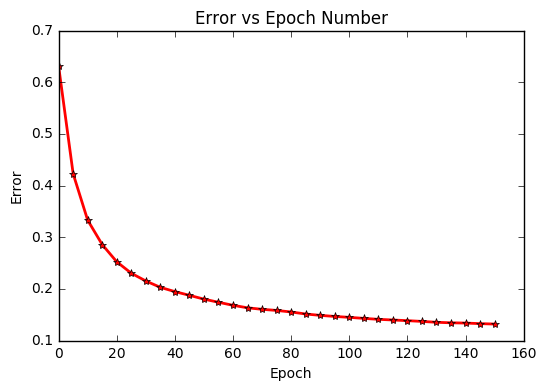

In [21]:
plt.plot(epoch_num,train_error,'-*',color = 'Red', lw = 2)
plt.title('Error vs Epoch Number')
plt.ylabel('Error')
plt.xlabel('Epoch')

#### Testing ######

In [22]:
bal_acc_5th = []
for i in range(len(result_train[2])):
    trained_weights = result_train[2][i]
    X = X_test
    y = y_test
    result_test = testPerceptronAlgo(X,y,0.01,trained_weights,150)
    y_hypo = result_test
    bal_accuracy = performance(y_hypo,'balanced accuracy')[-1]
    bal_acc_5th.append(bal_accuracy)

#### Obtaining the Testing Errors #####

In [23]:
epoch_num = list(range((np.shape(y_hypo)[0])))
#epoch_num = [i * 5 for i in epoch_num]

In [24]:
testing_error = [1 - i for i in bal_acc_5th]

#### Plotting both training and testing #####

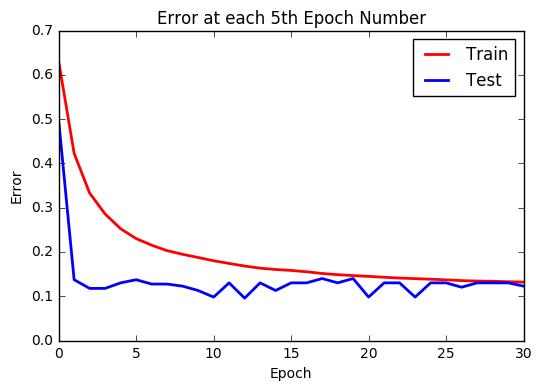

In [25]:
plt.plot(epoch_num,train_error,'-',color = 'Red', lw = 2)
plt.plot(epoch_num,testing_error,'-',color = 'Blue', lw = 2)
plt.title('Error at each 5th Epoch Number')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

#### Conducting cross-validation for nine trials #####

In [26]:
bal_accuracy_trials_test = [0]*9
recall_trials_test = [0]*9
precision_trials_test = [0]*9
f1_score_trials_test = [0]*9

bal_accuracy_trials_train = [0]*9
recall_trials_train = [0]*9
precision_trials_train = [0]*9
f1_score_trials_train = [0]*9

bal_acc_epochs = []

for i in range(0,9):
    X = data.loc[:,['P', 'N']]
    y = data.loc[:,'y_true']
    X = X.values
    y = y.values
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    wei = [0,0,1]
    X = X_train
    y = y_train
    result_train = trainPerceptronAlgo(X=X,y=y,learn_rate=0.01,weights=wei,num_epochs=150)
    y_hypo_train = result_train[0]
    
    bal_acc = performance(y_hypo_train,'balanced accuracy')
    
    bal_acc_epochs.extend([bal_acc])
    
    bal_accuracy_trials_train[i] = bal_acc[-1]
    recall_trials_train[i] = performance(y_hypo_train,'recall')[-1]
    precision_trials_train[i] = performance(y_hypo_train,'precision')[-1]
    f1_score_trials_train[i] = performance(y_hypo_train,'f1_score')[-1]
    
    trained_weights = [result_train[1][0][0], result_train[1][1][0], result_train[1][2]]
    X = X_test
    y = y_test
    result_test = testPerceptronAlgo(X,y,0.01,trained_weights,150)
    y_hypo_test = result_test
    
    bal_accuracy_trials_test[i] = performance(y_hypo_test,'balanced accuracy')[-1]
    recall_trials_test[i] = performance(y_hypo_test,'recall')[-1]
    precision_trials_test[i] = performance(y_hypo_test,'precision')[-1]
    f1_score_trials_test[i] = performance(y_hypo_test,'f1_score')[-1]
    


##### Plotting the CV results #####

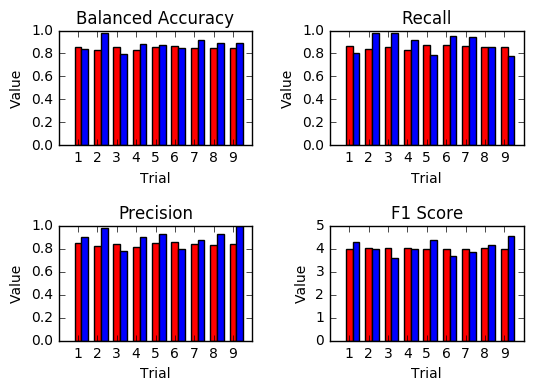

In [27]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ((ax,ax2),(ax3,ax4)) = plt.subplots(2,2)
rects1 = ax.bar(x - width/2, bal_accuracy_trials_train, width, label='Train',color='red')
rects2 = ax.bar(x + width/2, bal_accuracy_trials_test, width, label='Test',color='blue')
ax.set_xlabel('Trial')
ax.set_ylabel('Value')
ax.set_title('Balanced Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

rects1 = ax2.bar(x - width/2, recall_trials_train, width, label='Train',color='red')
rects2 = ax2.bar(x + width/2, recall_trials_test, width, label='Test',color='blue')
ax2.set_ylabel('Value')
ax2.set_xlabel('Trial')
ax2.set_title('Recall')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
#ax2.legend()

rects1 = ax3.bar(x - width/2, precision_trials_train, width, label='Train',color='red')
rects2 = ax3.bar(x + width/2, precision_trials_test, width, label='Test',color='blue')
ax3.set_ylabel('Value')
ax3.set_xlabel('Trial')
ax3.set_title('Precision')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
#ax3.legend()

rects1 = ax4.bar(x - width/2, f1_score_trials_train, width, label='Train',color='red')
rects2 = ax4.bar(x + width/2, f1_score_trials_test, width, label='Test',color='blue')
ax4.set_ylabel('Value')
ax4.set_xlabel('Trial')
ax4.set_title('F1 Score')
ax4.set_xticks(x)
ax4.set_xticklabels(labels)
#ax4.legend()


plt.subplots_adjust(hspace=0.7,wspace = 0.4)

###### Averages and Standard deviations ######

In [28]:

means = [np.mean(bal_accuracy_trials_test),np.mean(recall_trials_test), np.mean(precision_trials_test),np.mean(f1_score_trials_test)]
stds = [np.std(bal_accuracy_trials_test),np.std(recall_trials_test), np.std(precision_trials_test),np.std(f1_score_trials_test)]

In [29]:
means

[0.8790317118248664, 0.8884630431059855, 0.8968722340443043, 4.062564323428071]

In [30]:
stds

[0.04674934429966607,
 0.07753879623786933,
 0.07014735023845359,
 0.3044653203265218]

###### Trial-wise plotting ######

In [31]:
all_trials = np.array(bal_acc_epochs)
all_trials = pd.DataFrame(all_trials).T
all_trials_erros = all_trials.apply(lambda x: 1-x)
all_trials_erros.columns = ['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Trial 6', 'Trial 7', 'Trial 8', 'Trial 9']

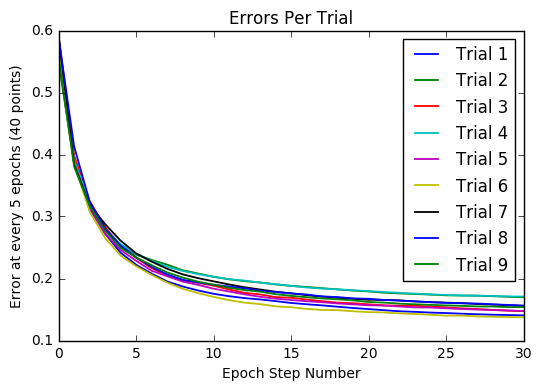

In [32]:
ax = all_trials_erros.plot.line(lw = 1.3)
ax.set_title("Errors Per Trial")
ax.set_xlabel("Epoch Step Number")
ax.set_ylabel("Error at every 5 epochs (40 points)")

In [33]:
all_trials_erros['mean'] = all_trials_erros.mean(axis=1)
all_trials_erros['std'] = all_trials_erros.std(axis=1)


##### Means with Std Deviation #####

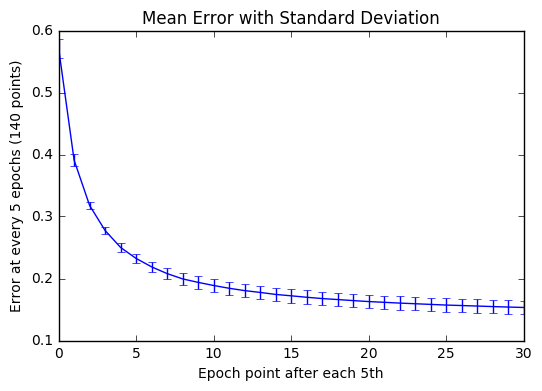

In [34]:
plt.errorbar(all_trials_erros.index, all_trials_erros['mean'], yerr=all_trials_erros['std'])
plt.title("Mean Error with Standard Deviation")
plt.xlabel("Epoch point after each 5th")
plt.ylabel("Error at every 5 epochs (140 points)")

###### Decision Boundary #####

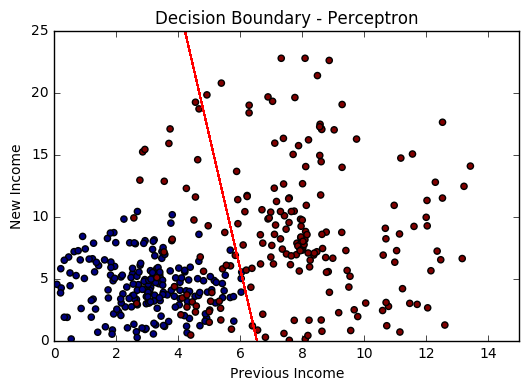

In [35]:
X = data.loc[:,['P', 'N']]
y = data.loc[:,'y_true']
X = X.values
y = y.values

plt.scatter(X[:,0],X[:,1],c=y)
vals = result_train[-1]
theta = vals[0][0]
intercept = vals[0][1]
y2 = X*theta + intercept
plt.plot(X,y2,color = 'Red')
plt.ylim((0, 25))
plt.xlim((0, 15))
plt.title("Decision Boundary - Perceptron")
plt.xlabel("Previous Income")
plt.ylabel("New Income")
